In [2]:
import pygplates
import pandas as pd
import sys
sys.path.append('/Users/Simon/GIT/PlateTectonicTools/')
#import ptt.subduction_convergence as sc
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

print pygplates.__version__

from reconstruction_classes import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.0.0.16


In [3]:
# Build an object describing a reconstruction model

M2016 = ReconstructionModel('Matthews++2016')
M2016.add_rotation_model('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
M2016.add_static_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/StaticPolygons/Muller_etal_AREPS_2016_StaticPolygons.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_TopologyBuildingBlocks.gpmlz')


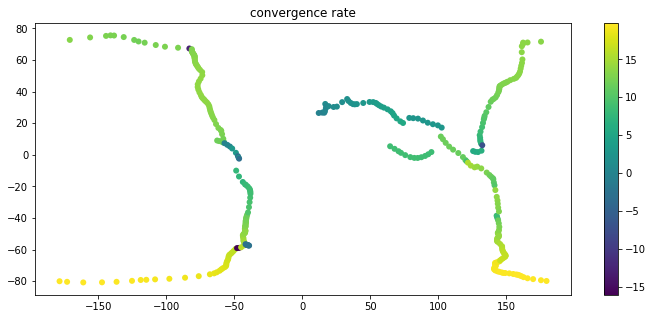

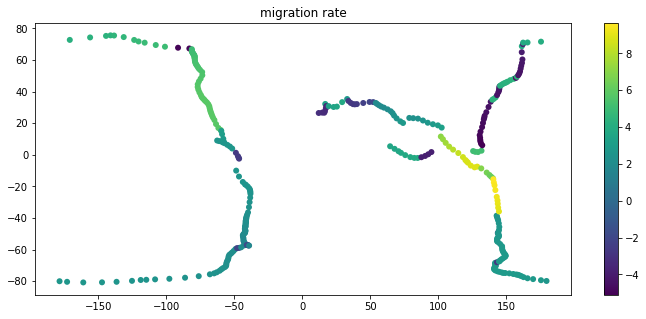

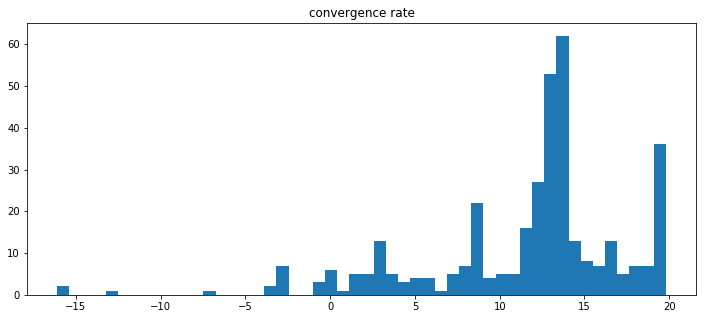

In [4]:
# compute the subduction zone kinematics for a single time snapshot
# results are returned in a 'SubductionConvergence' class object

subduction_kinematics_120Ma = M2016.subduction_convergence(120.,threshold_sampling_distance_radians=5.)

subduction_kinematics_120Ma.plot('cr')
subduction_kinematics_120Ma.plot('mr')

subduction_kinematics_120Ma.hist('cr')


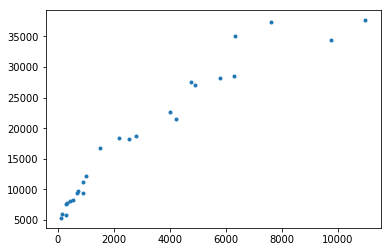

In [5]:
# generate a plate layout class for a single time snapshot

plates_90Ma = M2016.plate_snapshot(90.)

plt.plot(plates_90Ma.plate_areas,plates_90Ma.plate_perimeters,'.')


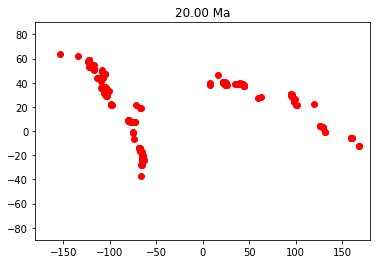

In [34]:
# load contents of a csv into a pandas dataframe, then generate a 
#'age_coded_point_dataset' object
#df = pd.read_csv('./Data/ngeo2429-s2.csv',index_col='Deposit number')
#ore_deposit_data = AgeCodedPointDataset(df,'Long.','Lat.','Age (Ma)')

ore_deposit_data = AgeCodedPointDataset('./Data/ngeo2429-s2.csv',
                                        field_mapping = {'longitude_field':'Long.',
                                                         'latitude_field':'Lat.',
                                                         'age_field':'Age (Ma)'})
#ore_deposit_data.from_csv('./Data/ngeo2429-s2.csv',
#                                                 'Long.','Lat.','Age (Ma)')

ore_deposit_data

ore_deposit_data.assign_reconstruction_model(M2016)

ore_deposit_data.plot_reconstructed(20.)


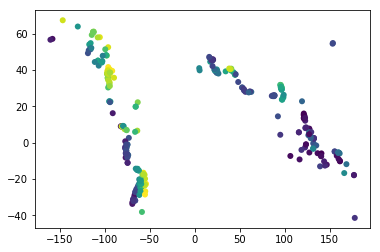

In [35]:
reconstructed_ore_deposit_data = ore_deposit_data.reconstruct_to_time_of_appearance()

plt.figure()
plt.scatter(zip(*reconstructed_ore_deposit_data)[0],
            zip(*reconstructed_ore_deposit_data)[1],
            c=zip(*reconstructed_ore_deposit_data)[2],edgecolors='')


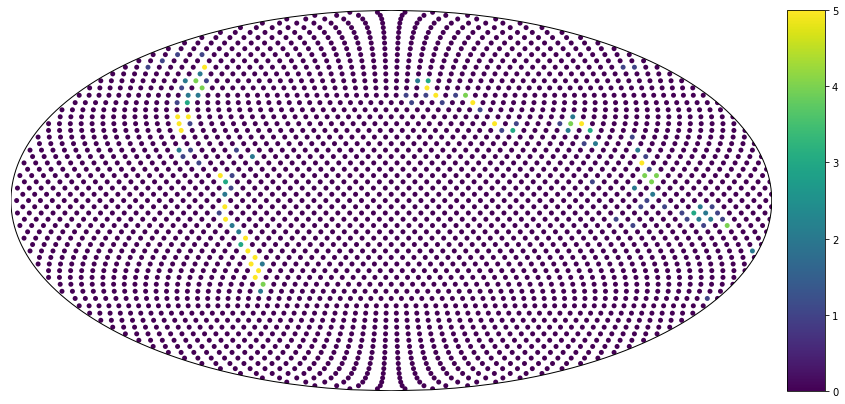

In [36]:
from mpl_toolkits.basemap import Basemap

equal_area_points = PointDistributionOnSphere(distribution_type='healpix',N=16)

bin_counts = equal_area_points.point_feature_heatmap(
    [point.get_geometry() for point in ore_deposit_data.point_features])

plt.figure(figsize=(16,7))
m = Basemap(projection='moll',lon_0=0)
x,y = m(equal_area_points.longitude,
        equal_area_points.latitude)
m.scatter(x,y,c=bin_counts, s=25, edgecolors='', vmax=5)
m.colorbar()
plt.show()



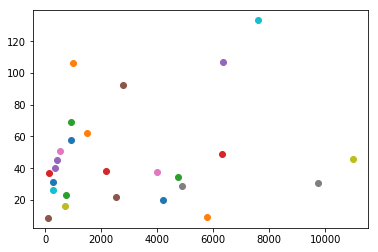

In [37]:
velocity_object = plates_90Ma.velocity_field(
    velocity_domain_features=[equal_area_points.meshnode_feature])

plt.figure()
for plate_id,plate_area in zip(plates_90Ma.plate_ids,plates_90Ma.plate_areas):
    #print plate_id,velocity_object.rms_velocity(plate_id)
    plt.plot(plate_area,velocity_object.rms_velocity(plate_id),'o')
plt.show()


In [38]:
plate_id = 501
rms = []
time_list = range(0,201,5)

equal_area_points = PointDistributionOnSphere(distribution_type='healpix',N=16)

for time in time_list:
    print time
    plates = M2016.plate_snapshot(time)
    velocity_object = plates.velocity_field(
        velocity_domain_features=[equal_area_points.meshnode_feature])
    rms.append(velocity_object.rms_velocity(plate_id))
    
print 'done'

#plt.plot(time_list,rms)


0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
done


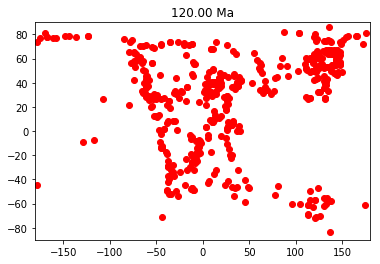

In [39]:
paleolithology_data = AgeCodedPointDataset('./Data/boucot_paleolithology_combined.shp')

paleolithology_data.assign_reconstruction_model(M2016)

paleolithology_data.plot_reconstructed(120.)


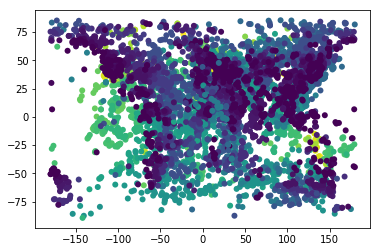

In [40]:
reconstructed_paleolithology_data = paleolithology_data.reconstruct_to_time_of_appearance()

plt.figure()
plt.scatter(zip(*reconstructed_paleolithology_data)[0],
            zip(*reconstructed_paleolithology_data)[1],
            c=zip(*reconstructed_paleolithology_data)[2],edgecolors='')


In [46]:
url = 'https://paleobiodb.org/data1.2/occs/list.csv?base_name=Bryozoa&max_ma=200&min_ma=0&show=coords'

paleobiology_data = AgeCodedPointDataset(url)




Its a url
